Data Project Rubric: 
Data Analysis with Python (Pandas & Matplotlib)

1. Project Overview 
●	Objective: Students should define the project's goal or main question. 

○	Example: Analyze reviews of BG3 for 0-10/10 reccommendations. 

●	Data Source: Describe where the data comes from and how it might answer the question.

○ Example: This data source comes from https://www.kaggle.com/datasets/harisyafie/baldurs-gate-3-steam-reviews/data 309K reviews from Steam digital distibution service, data is dated up to December 14 2023. 


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


2. Data Collection and Loading 

●	Load Data: Use Pandas to load a dataset (CSV, Excel, or database).

●	Initial Check: Display the first few rows and basic information about the dataset, noting column names, types, and missing values.

●	Selection Options:

○	Choose a dataset you find interesting (Video game sales, Sports stats, Carbon emissions, etc.).

○	Choose which columns or data to focus on and drop the rest.


In [69]:
BG3 = pd.read_csv("BG3_reviews_updated.csv")

BG3

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,written_during_early_access,comment_count,steam_purchase,received_for_free
0,153560814,english,This game hits all the right marks. 10/10,1702542971,1702542971,True,0,0,0.00,False,0,True,False
1,153560623,english,took me like 11 hours to understand the basics,1702542657,1702542657,True,0,0,0.00,False,0,True,False
2,153560414,english,10/10 game play and story! It's my first turn ...,1702542275,1702542275,True,0,0,0.00,False,0,True,False
3,153560343,english,gale is so baby girl,1702542158,1702542158,True,0,0,0.00,False,0,True,False
4,153559963,english,"YES,\n\nWITHOUT A F****N DOUBT.",1702541518,1702541518,True,0,0,0.00,False,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309098,77139066,english,can i have gay sex with the goblins?,1602008352,1602008352,True,287,326,0.34,True,0,True,False
309099,77139054,english,F TO THE R TO THE E TO THE A TO THE K \n\nExci...,1602008342,1602008342,True,30,5,0.05,True,0,True,False
309100,77139001,english,second,1602008270,1602008270,True,28,7,0.07,True,0,True,False
309101,77138476,english,Within 5 min I already chose a dwarf female lo...,1602007516,1602007516,True,141,105,0.40,True,8,True,False


In [70]:

BG3.head()


,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,written_during_early_access,comment_count,steam_purchase,received_for_free
0,153560814,english,This game hits all the right marks. 10/10,1702542971,1702542971,True,0,0,0.00,False,0,True,False
1,153560623,english,took me like 11 hours to understand the basics,1702542657,1702542657,True,0,0,0.00,False,0,True,False
2,153560414,english,10/10 game play and story! It's my first turn ...,1702542275,1702542275,True,0,0,0.00,False,0,True,False
3,153560343,english,gale is so baby girl,1702542158,1702542158,True,0,0,0.00,False,0,True,False
4,153559963,english,"YES,\n\nWITHOUT A F****N DOUBT.",1702541518,1702541518,True,0,0,0.00,False,0,True,False


In [71]:
BG3.shape

rows, columns = BG3.shape
print(f"BG3 dataset has {rows} rows and {columns} columns.")

BG3 dataset has 309103 rows and 13 columns.


In [72]:
BG3.describe()


,recommendationid,timestamp_created,timestamp_updated,votes_up,votes_funny,weighted_vote_score,comment_count
count,309103.00,309103.00,309103.00,309103.00,309103.00,309103.00,309103.00
mean,139500152.76,1685486942.06,1687336243.42,1.73,0.33,0.11,0.04
std,19689308.39,26380186.38,24358568.74,74.09,16.04,0.21,1.73
min,77136300.00,1602004588.00,1602004588.00,0.00,0.00,0.00,0.00
25%,143664700.00,1691513932.50,1691664913.50,0.00,0.00,0.00,0.00
50%,144965843.00,1692942695.00,1693191860.00,0.00,0.00,0.00,0.00
75%,147975741.00,1696945735.00,1698380890.50,1.00,0.00,0.00,0.00
max,153560814.00,1702542971.00,1702553708.00,15728.00,3970.00,0.98,592.00


In [73]:
BG3 = BG3.drop(['language','voted_up','votes_up','written_during_early_access','votes_funny','weighted_vote_score','comment_count'], axis=1)
BG3

,recommendationid,review,timestamp_created,timestamp_updated,steam_purchase,received_for_free
0,153560814,This game hits all the right marks. 10/10,1702542971,1702542971,True,False
1,153560623,took me like 11 hours to understand the basics,1702542657,1702542657,True,False
2,153560414,10/10 game play and story! It's my first turn ...,1702542275,1702542275,True,False
3,153560343,gale is so baby girl,1702542158,1702542158,True,False
4,153559963,"YES,\n\nWITHOUT A F****N DOUBT.",1702541518,1702541518,True,False
...,...,...,...,...,...,...
309098,77139066,can i have gay sex with the goblins?,1602008352,1602008352,True,False
309099,77139054,F TO THE R TO THE E TO THE A TO THE K \n\nExci...,1602008342,1602008342,True,False
309100,77139001,second,1602008270,1602008270,True,False
309101,77138476,Within 5 min I already chose a dwarf female lo...,1602007516,1602007516,True,False


In [74]:
BG3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309103 entries, 0 to 309102
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   recommendationid   309103 non-null  int64 
 1   review             308086 non-null  object
 2   timestamp_created  309103 non-null  int64 
 3   timestamp_updated  309103 non-null  int64 
 4   steam_purchase     309103 non-null  bool  
 5   received_for_free  309103 non-null  bool  
dtypes: bool(2), int64(3), object(1)
memory usage: 10.0+ MB


3. Data Cleaning and Preparation 

●	Handle Missing Values: Choose how to handle missing values (drop, fill, or leave as is).

○	Explain why you did this drop, fill, etc.: Left as is, as I am looking for the score out of 10 that the reviewer left those without a review or a score are not counted in the analysis. I am also looking to compare the number of free versions vs purchases that were reviewed. 

●	Data Type Adjustments: Convert columns to appropriate types (e.g., dates to datetime).

●	Feature Engineering: Create at least one new feature from existing data. -- ***********need to build a column to consididate Free vs Steam purchace ***************

○	Extracted the reviews that gave a score for reccommendation of the game.  


In [75]:
BG3.isnull()

BG3.any()

recommendationid     True
review               True
timestamp_created    True
timestamp_updated    True
steam_purchase       True
received_for_free    True
dtype: bool

In [76]:
missing_values = BG3.isna()
print(missing_values)

        recommendationid  review  timestamp_created  timestamp_updated  \
0                  False   False              False              False   
1                  False   False              False              False   
2                  False   False              False              False   
3                  False   False              False              False   
4                  False   False              False              False   
...                  ...     ...                ...                ...   
309098             False   False              False              False   
309099             False   False              False              False   
309100             False   False              False              False   
309101             False   False              False              False   
309102             False   False              False              False   

        steam_purchase  received_for_free  
0                False              False  
1                False 

In [77]:
missing_count = BG3.isna().sum()
print(missing_count)

recommendationid        0
review               1017
timestamp_created       0
timestamp_updated       0
steam_purchase          0
received_for_free       0
dtype: int64


In [78]:
#BG3['timestamp_created'] = pd.to_datetime(BG3['timestamp_created'])
BG3['timestamp_created'] = pd.to_datetime(BG3['timestamp_created'], unit='s')
BG3
#convert from unix 
#unix_timestamp = 1643723400  # example Unix timestamp

#date_object = pd.to_datetime(unix_timestamp, unit='s')
#print(date_object)  # Output: 2022-02-01 00:00:00

,recommendationid,review,timestamp_created,timestamp_updated,steam_purchase,received_for_free
0,153560814,This game hits all the right marks. 10/10,2023-12-14 08:36:11,1702542971,True,False
1,153560623,took me like 11 hours to understand the basics,2023-12-14 08:30:57,1702542657,True,False
2,153560414,10/10 game play and story! It's my first turn ...,2023-12-14 08:24:35,1702542275,True,False
3,153560343,gale is so baby girl,2023-12-14 08:22:38,1702542158,True,False
4,153559963,"YES,\n\nWITHOUT A F****N DOUBT.",2023-12-14 08:11:58,1702541518,True,False
...,...,...,...,...,...,...
309098,77139066,can i have gay sex with the goblins?,2020-10-06 18:19:12,1602008352,True,False
309099,77139054,F TO THE R TO THE E TO THE A TO THE K \n\nExci...,2020-10-06 18:19:02,1602008342,True,False
309100,77139001,second,2020-10-06 18:17:50,1602008270,True,False
309101,77138476,Within 5 min I already chose a dwarf female lo...,2020-10-06 18:05:16,1602007516,True,False


In [79]:

BG3['timestamp_updated'] = pd.to_datetime(BG3['timestamp_updated'], unit='s')
BG3

,recommendationid,review,timestamp_created,timestamp_updated,steam_purchase,received_for_free
0,153560814,This game hits all the right marks. 10/10,2023-12-14 08:36:11,2023-12-14 08:36:11,True,False
1,153560623,took me like 11 hours to understand the basics,2023-12-14 08:30:57,2023-12-14 08:30:57,True,False
2,153560414,10/10 game play and story! It's my first turn ...,2023-12-14 08:24:35,2023-12-14 08:24:35,True,False
3,153560343,gale is so baby girl,2023-12-14 08:22:38,2023-12-14 08:22:38,True,False
4,153559963,"YES,\n\nWITHOUT A F****N DOUBT.",2023-12-14 08:11:58,2023-12-14 08:11:58,True,False
...,...,...,...,...,...,...
309098,77139066,can i have gay sex with the goblins?,2020-10-06 18:19:12,2020-10-06 18:19:12,True,False
309099,77139054,F TO THE R TO THE E TO THE A TO THE K \n\nExci...,2020-10-06 18:19:02,2020-10-06 18:19:02,True,False
309100,77139001,second,2020-10-06 18:17:50,2020-10-06 18:17:50,True,False
309101,77138476,Within 5 min I already chose a dwarf female lo...,2020-10-06 18:05:16,2020-10-06 18:05:16,True,False


In [80]:
column_list = BG3.columns
list(column_list)


['recommendationid',
 'review',
 'timestamp_created',
 'timestamp_updated',
 'steam_purchase',
 'received_for_free']

In [82]:
# change booleann to str, True to Steam in column 'steam_purchase'
BG3['steam_purchase'] = BG3['steam_purchase'].replace({True:'True', False:'False'})
BG3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309103 entries, 0 to 309102
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   recommendationid   309103 non-null  int64         
 1   review             308086 non-null  object        
 2   timestamp_created  309103 non-null  datetime64[ns]
 3   timestamp_updated  309103 non-null  datetime64[ns]
 4   steam_purchase     309103 non-null  object        
 5   received_for_free  309103 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(2)
memory usage: 12.1+ MB


In [95]:
#change boolean to str in 'recevied_for_free'
BG3['received_for_free'] = BG3['received_for_free'].replace({True: 'True', False:'False'})
BG3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309103 entries, 0 to 309102
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   recommendationid   309103 non-null  int64         
 1   review             308086 non-null  object        
 2   timestamp_created  309103 non-null  datetime64[ns]
 3   timestamp_updated  309103 non-null  datetime64[ns]
 4   steam_purchase     309103 non-null  object        
 5   received_for_free  309103 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.1+ MB


In [100]:
# change yes in steam column to Steam, change yes in free column to free
# BG3['steam_purchase'].replace('True', 'Steam', inplace=True)
# BG3.replace({'steam_purchase':'True','Steam':}, inplace=True)
BG3['steam_purchase'] = BG3['steam_purchase'].replace({'True':'Steam','False':''})
BG3['received_for_free'] = BG3['received_for_free'].replace({'True':'Free','False':''})
BG3
# build a column to consolidate Free vs Steam purchase
# BG3['steam_purchase'].value_counts()
BG3['received_for_free'].value_counts()

received_for_free
        306024
Free      3079
Name: count, dtype: int64

In [101]:
#concatenate 'steam_purchase' and 'received_for_free' to build new column 'Access_Method'
#df['new column'] = df['column1'] + df['column2']
BG3['Access_Method'] = BG3['steam_purchase'] + BG3['received_for_free']
BG3


,recommendationid,review,timestamp_created,timestamp_updated,steam_purchase,received_for_free,Access_Method
0,153560814,This game hits all the right marks. 10/10,2023-12-14 08:36:11,2023-12-14 08:36:11,Steam,,Steam
1,153560623,took me like 11 hours to understand the basics,2023-12-14 08:30:57,2023-12-14 08:30:57,Steam,,Steam
2,153560414,10/10 game play and story! It's my first turn ...,2023-12-14 08:24:35,2023-12-14 08:24:35,Steam,,Steam
3,153560343,gale is so baby girl,2023-12-14 08:22:38,2023-12-14 08:22:38,Steam,,Steam
4,153559963,"YES,\n\nWITHOUT A F****N DOUBT.",2023-12-14 08:11:58,2023-12-14 08:11:58,Steam,,Steam
...,...,...,...,...,...,...,...
309098,77139066,can i have gay sex with the goblins?,2020-10-06 18:19:12,2020-10-06 18:19:12,Steam,,Steam
309099,77139054,F TO THE R TO THE E TO THE A TO THE K \n\nExci...,2020-10-06 18:19:02,2020-10-06 18:19:02,Steam,,Steam
309100,77139001,second,2020-10-06 18:17:50,2020-10-06 18:17:50,Steam,,Steam
309101,77138476,Within 5 min I already chose a dwarf female lo...,2020-10-06 18:05:16,2020-10-06 18:05:16,Steam,,Steam


In [107]:
#change 'SteamFree' to 'Both
BG3['Access_Method'] = BG3['Access_Method'].replace({'SteamFree':'Both','':'No Response'})
BG3

,recommendationid,review,timestamp_created,timestamp_updated,Access_Method
0,153560814,This game hits all the right marks. 10/10,2023-12-14 08:36:11,2023-12-14 08:36:11,Steam
1,153560623,took me like 11 hours to understand the basics,2023-12-14 08:30:57,2023-12-14 08:30:57,Steam
2,153560414,10/10 game play and story! It's my first turn ...,2023-12-14 08:24:35,2023-12-14 08:24:35,Steam
3,153560343,gale is so baby girl,2023-12-14 08:22:38,2023-12-14 08:22:38,Steam
4,153559963,"YES,\n\nWITHOUT A F****N DOUBT.",2023-12-14 08:11:58,2023-12-14 08:11:58,Steam
...,...,...,...,...,...
309098,77139066,can i have gay sex with the goblins?,2020-10-06 18:19:12,2020-10-06 18:19:12,Steam
309099,77139054,F TO THE R TO THE E TO THE A TO THE K \n\nExci...,2020-10-06 18:19:02,2020-10-06 18:19:02,Steam
309100,77139001,second,2020-10-06 18:17:50,2020-10-06 18:17:50,Steam
309101,77138476,Within 5 min I already chose a dwarf female lo...,2020-10-06 18:05:16,2020-10-06 18:05:16,Steam


In [108]:
BG3['Access_Method'].value_counts()

Access_Method
Steam          277290
No Response     28734
Free             2113
Both              966
Name: count, dtype: int64

In [105]:
#drop 'steam_purchse' & 'received_for_free' columns
BG3 = BG3.drop(['steam_purchase','received_for_free'],axis=1)
BG3

,recommendationid,review,timestamp_created,timestamp_updated,Access_Method
0,153560814,This game hits all the right marks. 10/10,2023-12-14 08:36:11,2023-12-14 08:36:11,Steam
1,153560623,took me like 11 hours to understand the basics,2023-12-14 08:30:57,2023-12-14 08:30:57,Steam
2,153560414,10/10 game play and story! It's my first turn ...,2023-12-14 08:24:35,2023-12-14 08:24:35,Steam
3,153560343,gale is so baby girl,2023-12-14 08:22:38,2023-12-14 08:22:38,Steam
4,153559963,"YES,\n\nWITHOUT A F****N DOUBT.",2023-12-14 08:11:58,2023-12-14 08:11:58,Steam
...,...,...,...,...,...
309098,77139066,can i have gay sex with the goblins?,2020-10-06 18:19:12,2020-10-06 18:19:12,Steam
309099,77139054,F TO THE R TO THE E TO THE A TO THE K \n\nExci...,2020-10-06 18:19:02,2020-10-06 18:19:02,Steam
309100,77139001,second,2020-10-06 18:17:50,2020-10-06 18:17:50,Steam
309101,77138476,Within 5 min I already chose a dwarf female lo...,2020-10-06 18:05:16,2020-10-06 18:05:16,Steam


In [84]:
BG3["review"].value_counts()

review
good                                                                                                                                                                                                                                                                  1937
GOTY                                                                                                                                                                                                                                                                  1452
yes                                                                                                                                                                                                                                                                   1406
10-Oct                                                                                                                                                                                          

In [87]:
def count_and_sum_patterns(BG3, column):
    pattern_counts = {}
    for i in range(1, 11):
        pattern = f"{i}/10"
        count = BG3['review'].str.contains(pattern).sum()
        pattern_counts[pattern] = count
    return pattern_counts

# Count and sum patterns
result = count_and_sum_patterns(BG3, 'review')
print(result)



{'1/10': 1799, '2/10': 354, '3/10': 122, '4/10': 81, '5/10': 1002, '6/10': 166, '7/10': 354, '8/10': 676, '9/10': 1574, '10/10': 17830}


In [88]:
# if statement if reveiw column does not contain result .drop(axis=0) 
result 

{'1/10': 1799,
 '2/10': 354,
 '3/10': 122,
 '4/10': 81,
 '5/10': 1002,
 '6/10': 166,
 '7/10': 354,
 '8/10': 676,
 '9/10': 1574,
 '10/10': 17830}

In [89]:
total_sum = sum(result.values())

#calculate the percentage of each item
percentages = {key: (value/total_sum) * 100 for key, value in result.items()}

#format the percentages to 2 decimal places
formatted_percentages = {key: round(value, 2) for key, value in percentages.items()}

print("Total sum:", total_sum)
print("Percentages:", formatted_percentages)

Total sum: 23958
Percentages: {'1/10': 7.51, '2/10': 1.48, '3/10': 0.51, '4/10': 0.34, '5/10': 4.18, '6/10': 0.69, '7/10': 1.48, '8/10': 2.82, '9/10': 6.57, '10/10': 74.42}


4. Exploratory Data Analysis (EDA) 

●	Descriptive Statistics: Provide summary statistics (mean, median, min, max) for numerical columns.

●	Data Visualizations:

○	Required: One visualization (e.g., line plot) if time-series data is relevant.

○	Optional: Additional visuals like bar charts for comparisons, histograms for distributions, or scatter plots for relationships.


In [90]:
summary = BG3.describe()
print(summary)

summary = BG3.describe()
pd.set_option('display.float_format', '{:.2f}'.format)
print(summary)

       recommendationid              timestamp_created  \
count         309103.00                         309103   
mean       139500152.76  2023-05-30 22:49:02.055289344   
min         77136300.00            2020-10-06 17:16:28   
25%        143664700.00     2023-08-08 16:58:52.500000   
50%        144965843.00            2023-08-25 05:51:35   
75%        147975741.00            2023-10-10 13:48:55   
max        153560814.00            2023-12-14 08:36:11   
std         19689308.39                            NaN   

                   timestamp_updated  
count                         309103  
mean   2023-06-21 08:30:43.423881472  
min              2020-10-06 17:16:28  
25%       2023-08-10 10:55:13.500000  
50%              2023-08-28 03:04:20  
75%       2023-10-27 04:28:10.500000  
max              2023-12-14 11:35:08  
std                              NaN  
       recommendationid              timestamp_created  \
count         309103.00                         309103   
mean      

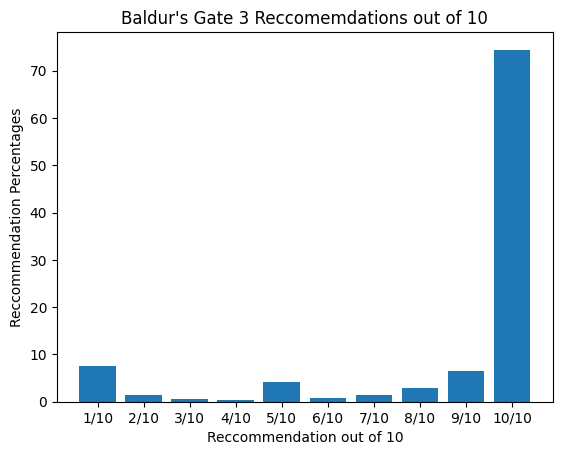

In [91]:
#define ticks and adjust x,y axix to clean up the plot

plt.bar(formatted_percentages.keys(), formatted_percentages.values())
#plt.yticks([0, 100, 10]))
plt.xlabel('Reccommendation out of 10')
plt.ylabel('Reccommendation Percentages')
plt.title("Baldur's Gate 3 Reccomemdations out of 10")
# plt.yticks(np.arange(0, 10, 100))
plt.show()

<Axes: xlabel='Access_Method'>

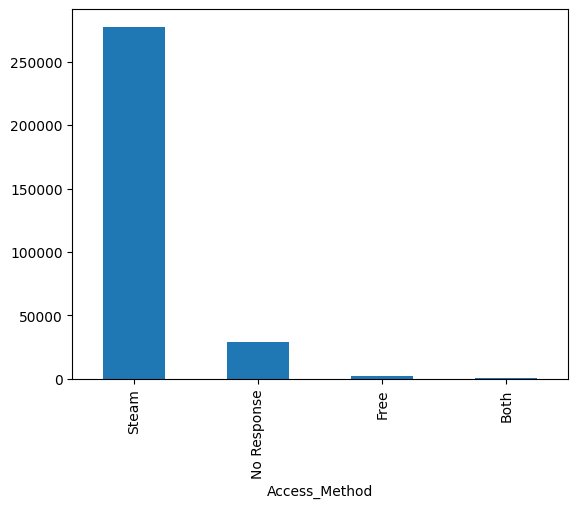

In [110]:
BG3['Access_Method'].value_counts().plot(kind='bar', rot=90)

5. Analysis and Insights

●	Findings: Summarize any patterns observed and address the main project question.

●	Supporting Data: Reference specific statistics or plot features to back up findings.


6. Conclusion and Recommendations (10 points)

●	Summarize: The majority of reviews came from purchases of the game Baldur's Gate 3; 3079 were free, 278256 were Steam purchases. Of the reviews submitted, 23958 contained a reccommendation rating out of 10. 74% of players reccommend BG3 at a 10/10. Larian Studios has produced a highly reccommended game.

●	Recommendations: Compile updated data from December 14, 2023 to present to determine the continued popularity of the game and the statistical reccommendations since this data was compiled. Analysis of continued reccommendations  will give Larian Studios addtional areas to concentrate on for updates and continued player satisfaction. 


Optional Advanced Section (Bonus)

●	Advanced EDA: Use pair plots or correlation matrices to explore relationships.

●	Dashboards: Create a simple dashboard with Matplotlib or extend to Dash/Streamlit.
